# En este ejercicio a calcular la importancia relativa de las features#
 
Vamos a intentar responder a la pregunta, 

¿ Qué carácterísticas son mas importantes en un equipo, para estar bien clasificado ? 


In [1]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")



/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df["Resultado"]   =  "Zona fria"
df["Resultado"].iloc[4:6]     = "Europa League"
df["Resultado"].iloc[0:4]     = "Champions League"
df["Resultado"].iloc[16:20]   = "Descenso"
df["Resultado"].iloc[6:16]    = "Zona fria"


In [3]:
# Quitamos la info innecesaria
del df["Equipo"]
df

,PJ,PG,PE,PP,GF,GC,DIF,PTS,Resultado
0,36,27,9,0,94,24,70,90,Champions League
1,36,22,9,5,55,20,35,75,Champions League
2,36,21,9,6,86,42,44,72,Champions League
3,36,20,7,9,62,37,25,67,Champions League
4,36,18,5,13,56,56,0,59,Europa League
5,36,17,6,13,51,46,5,57,Europa League
6,36,16,6,14,46,56,-10,54,Zona fria
7,36,14,10,12,41,32,9,52,Zona fria
8,36,13,9,14,48,57,-9,48,Zona fria
9,36,13,8,15,41,48,-7,47,Zona fria


## Sacamos las distribuciones y el histograma, ##

         PJ         PG         PE         PP         GF         GC      DIF  \
count  20.0  20.000000  20.000000  20.000000  20.000000  20.000000  20.0000   
mean   36.0  13.850000   8.300000  13.850000  47.650000  47.650000   0.0000   
std     0.0   5.788146   2.903718   6.072154  18.675272  12.990989  27.5318   
min    36.0   5.000000   2.000000   0.000000  23.000000  20.000000 -48.0000   
25%    36.0  10.000000   6.750000  12.750000  36.500000  41.750000 -11.5000   
50%    36.0  13.000000   8.500000  13.500000  43.500000  48.000000  -6.0000   
75%    36.0  17.250000  10.000000  16.500000  55.250000  56.000000   7.5000   
max    36.0  27.000000  13.000000  26.000000  94.000000  71.000000  70.0000   

             PTS  
count  20.000000  
mean   49.850000  
std    17.168745  
min    20.000000  
25%    43.000000  
50%    46.500000  
75%    57.500000  
max    90.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cfb38d0>,
      dtype=object)

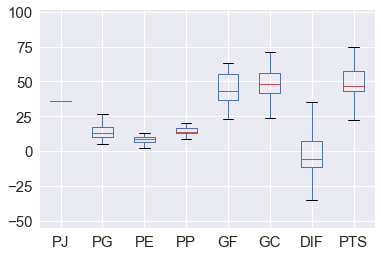

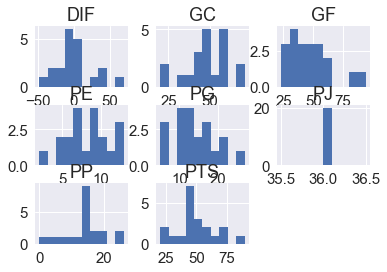

In [7]:
import matplotlib.pyplot as plt
print(df.describe())
df.boxplot()
df.hist()

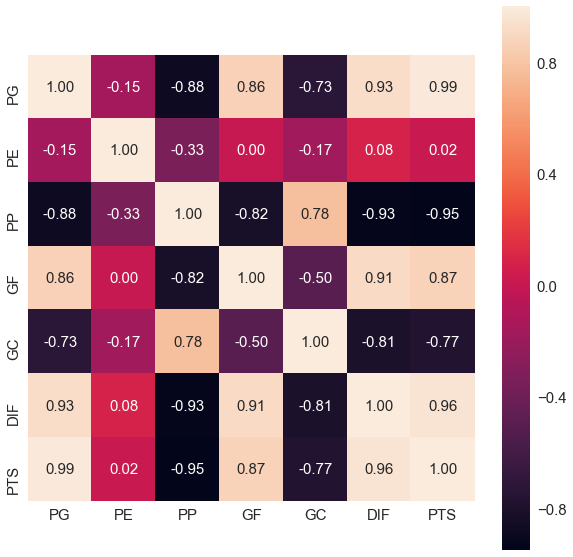

In [8]:
import seaborn as sns
import numpy as np


cols = [ 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS']

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

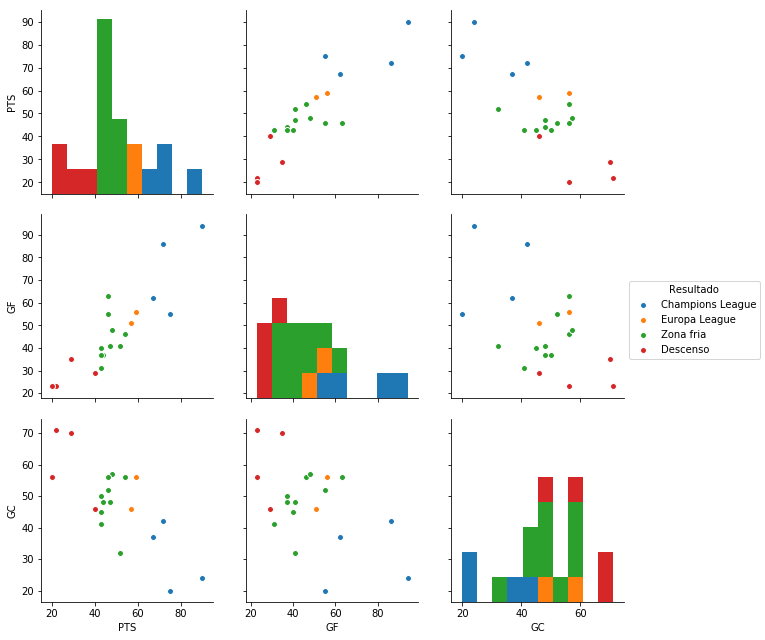

In [9]:
import seaborn.apionly as sns

sns.pairplot( data=df[[ "PTS" , "GF" , "GC" , "Resultado" ]] ,hue="Resultado", size=3)



## Seleccionamos las 3 Features mas importantes. ##

Beneficios de reducir las dimensiones

- Reduce el overfiting, porque hace menos probable tomar decisiones basadas en ruido.
- Mejora la precisión (Accuracy).
- Mejora los tiempos de training. Al haber menos datos es mas rápido.


In [12]:
from sklearn.feature_selection import RFE 
"""
De la docu oficial : Feature ranking with Recursive Feature Elimination.

Given an external estimator that assigns weights to features, 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
"""

from sklearn.linear_model import LogisticRegression
  
NUM_COLUMNAS=df.shape[1]

array = df.values
X = array[:,0:NUM_COLUMNAS-1]
Y = array[:,NUM_COLUMNAS-1]

print("X:" , X)
print("Y:" , Y)

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

# Print results
print("Columnas: "          , df.columns      ) 
print("Num Features: "      , fit.n_features_ ) 
print("Selected Features: " , fit.support_    )
print("Feature Ranking: "   , fit.ranking_    )


X: [[36 27 9 0 94 24 70 90]
 [36 22 9 5 55 20 35 75]
 [36 21 9 6 86 42 44 72]
 [36 20 7 9 62 37 25 67]
 [36 18 5 13 56 56 0 59]
 [36 17 6 13 51 46 5 57]
 [36 16 6 14 46 56 -10 54]
 [36 14 10 12 41 32 9 52]
 [36 13 9 14 48 57 -9 48]
 [36 13 8 15 41 48 -7 47]
 [36 13 7 16 63 56 7 46]
 [36 12 10 14 55 52 3 46]
 [36 14 2 20 37 48 -11 44]
 [36 10 13 13 40 45 -5 43]
 [36 10 13 13 31 41 -10 43]
 [36 10 13 13 37 50 -13 43]
 [36 11 7 18 29 46 -17 40]
 [36 6 11 19 35 70 -35 29]
 [36 5 7 24 23 71 -48 22]
 [36 5 5 26 23 56 -33 20]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso'
 'Descenso']
Columnas:  Index(['PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS', 'Resultado'], dtype='object')
Num Features:  3
Selected Features:  [False False  True  True False False  True False]
Feature 

# Importancia relativa de la features

[0.         0.20694056 0.06708723 0.26985108 0.11983311 0.05374579
 0.10547552 0.17706672]


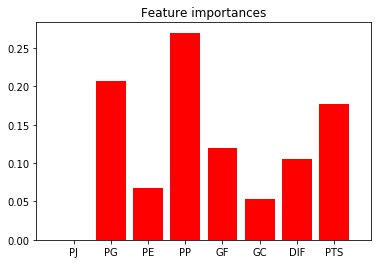

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

Y si quitamos los puntos (que es un valor calculado a partir de otras columnas) 
¿ Qué features seran las mas importantes ? 

In [14]:
df_sinpuntos = df
del df_sinpuntos['PTS']
df.head(2)

,PJ,PG,PE,PP,GF,GC,DIF,Resultado
0,36,27,9,0,94,24,70,Champions League
1,36,22,9,5,55,20,35,Champions League


X: [[36 27 9 0 94 24 70]
 [36 22 9 5 55 20 35]
 [36 21 9 6 86 42 44]
 [36 20 7 9 62 37 25]
 [36 18 5 13 56 56 0]
 [36 17 6 13 51 46 5]
 [36 16 6 14 46 56 -10]
 [36 14 10 12 41 32 9]
 [36 13 9 14 48 57 -9]
 [36 13 8 15 41 48 -7]
 [36 13 7 16 63 56 7]
 [36 12 10 14 55 52 3]
 [36 14 2 20 37 48 -11]
 [36 10 13 13 40 45 -5]
 [36 10 13 13 31 41 -10]
 [36 10 13 13 37 50 -13]
 [36 11 7 18 29 46 -17]
 [36 6 11 19 35 70 -35]
 [36 5 7 24 23 71 -48]
 [36 5 5 26 23 56 -33]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso'
 'Descenso']
[0.         0.22439302 0.11186744 0.19666005 0.09280303 0.13508871
 0.23918775]


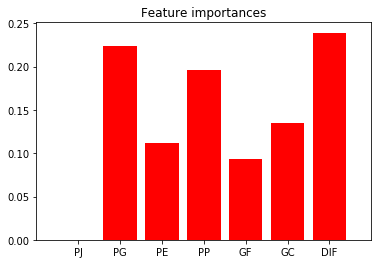

In [15]:


X = df_sinpuntos.values[:,0:7]
Y = df_sinpuntos.values[:,7]


print("X:" , X)
print("Y:" , Y)

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

**Conclusión**, si no contamos los puntos que lleva el equpo, lo mas importante para predecir si un equipo ira a europa/descenderá.
- Son los partidos ganados PG , 

- y meter mas goles de los que te meten DIF.

Solo por eso, voy a volver a poner la foto de la neurona.

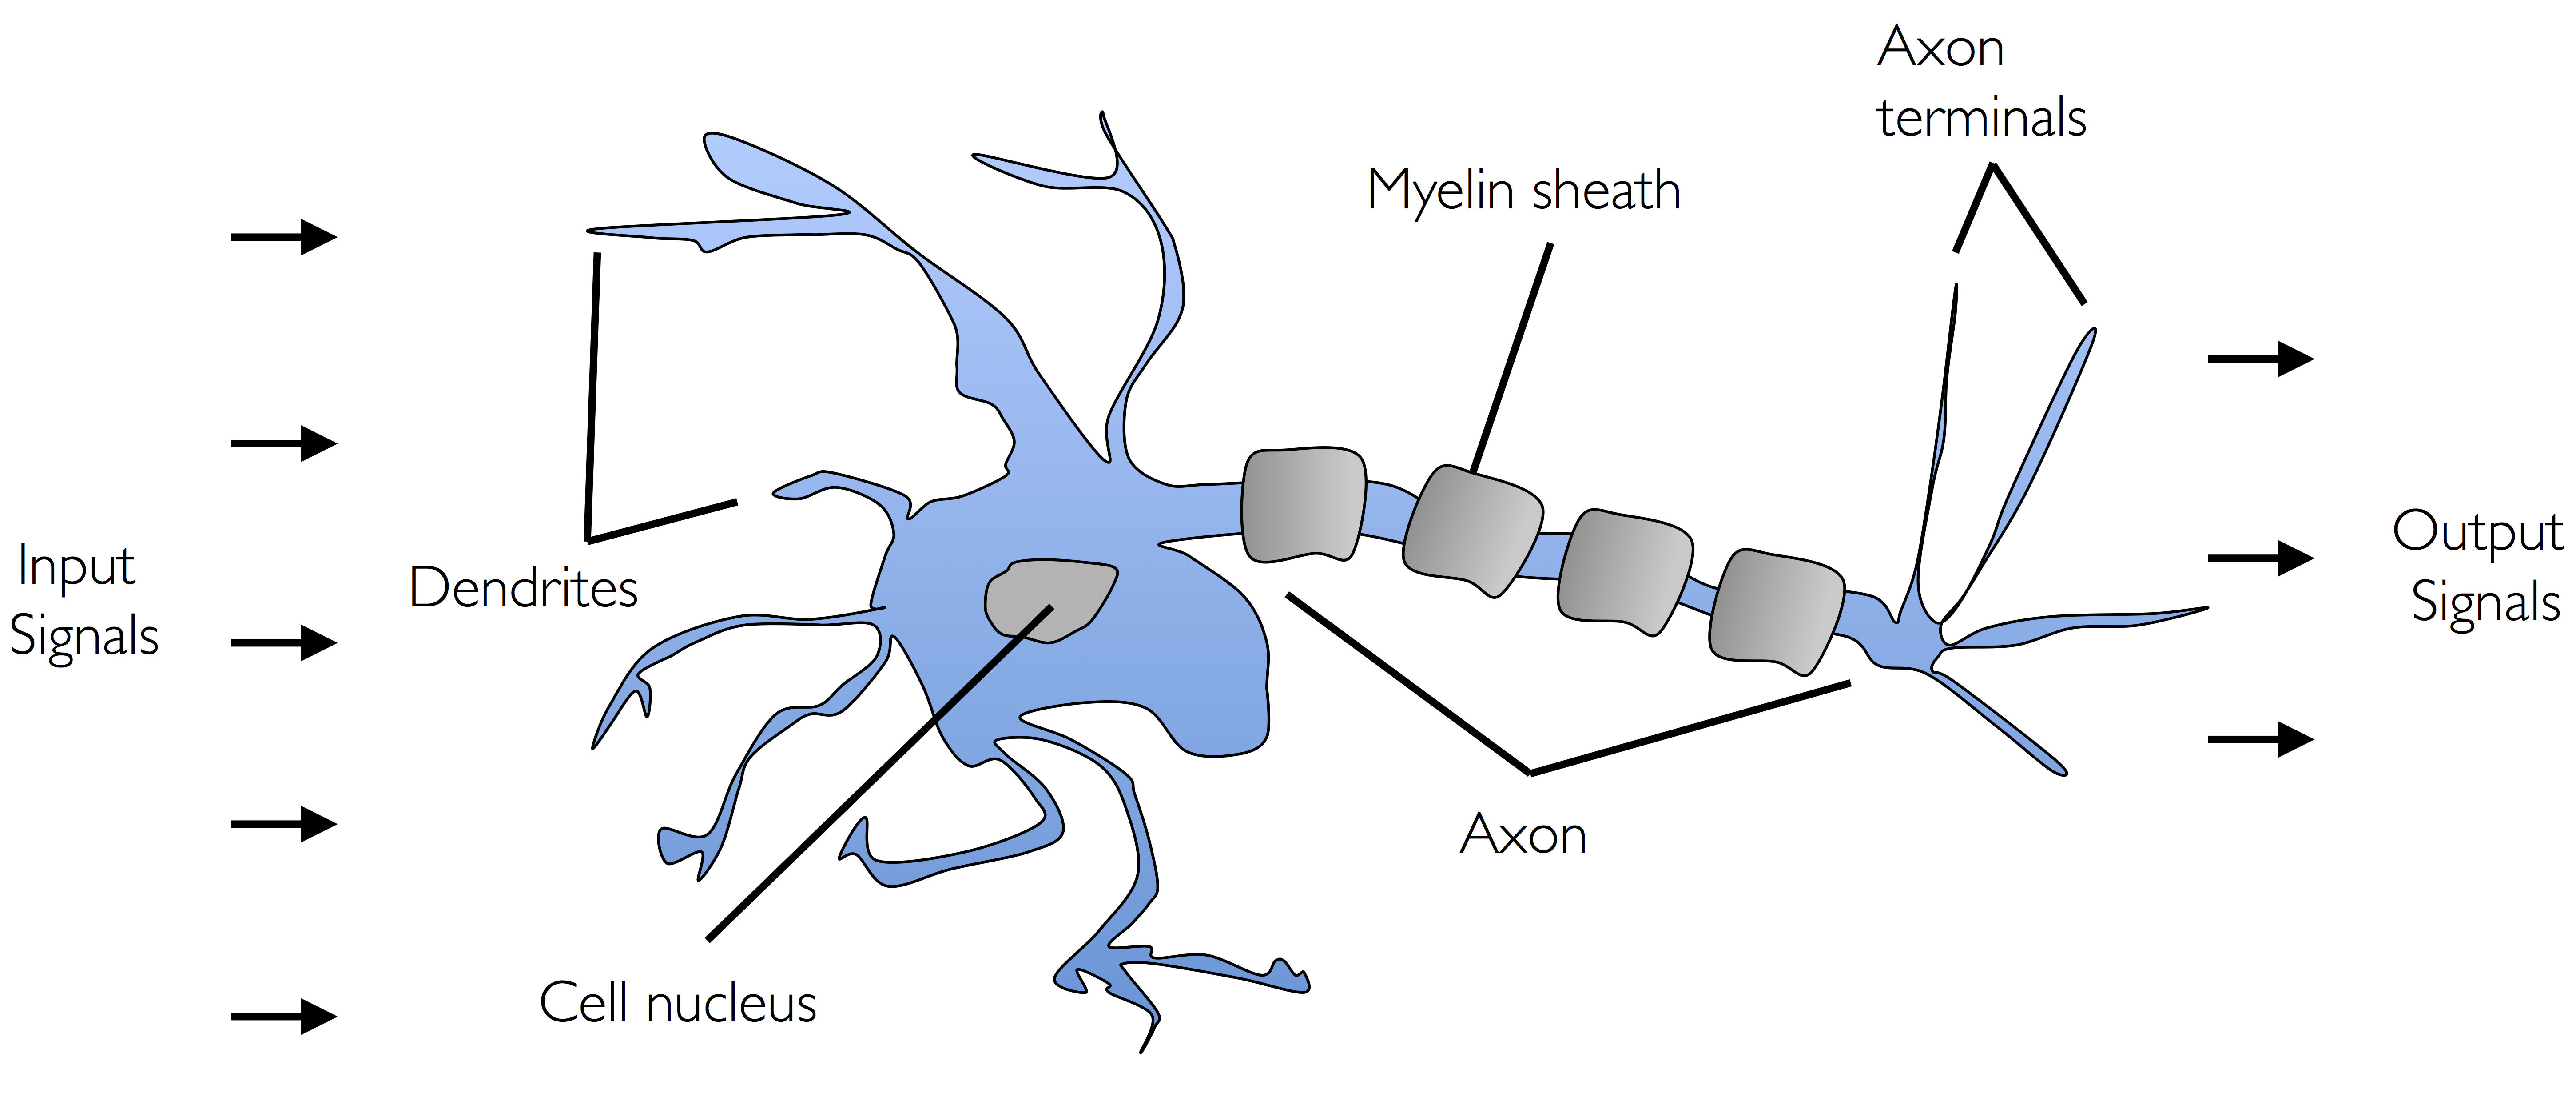

In [24]:
from IPython.display import Image
Image(filename='../code/ch02/images/02_01.png', width=500) 

### Bonus track : Quitar dimensiones usando PCA ###

Una forma fácil de reducir dimensionas es usa PCA.

En el ejemplo, quitamos dimensiones a nuestro dataset de futbol, reduciendo a dos dimensiones.

[[36 27 9 0 94 24 70]
 [36 22 9 5 55 20 35]
 [36 21 9 6 86 42 44]
 [36 20 7 9 62 37 25]
 [36 18 5 13 56 56 0]
 [36 17 6 13 51 46 5]
 [36 16 6 14 46 56 -10]
 [36 14 10 12 41 32 9]
 [36 13 9 14 48 57 -9]
 [36 13 8 15 41 48 -7]
 [36 13 7 16 63 56 7]
 [36 12 10 14 55 52 3]
 [36 14 2 20 37 48 -11]
 [36 10 13 13 40 45 -5]
 [36 10 13 13 31 41 -10]
 [36 10 13 13 37 50 -13]
 [36 11 7 18 29 46 -17]
 [36 6 11 19 35 70 -35]
 [36 5 7 24 23 71 -48]
 [36 5 5 26 23 56 -33]] [0 0 0 0 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1]
(20, 2)


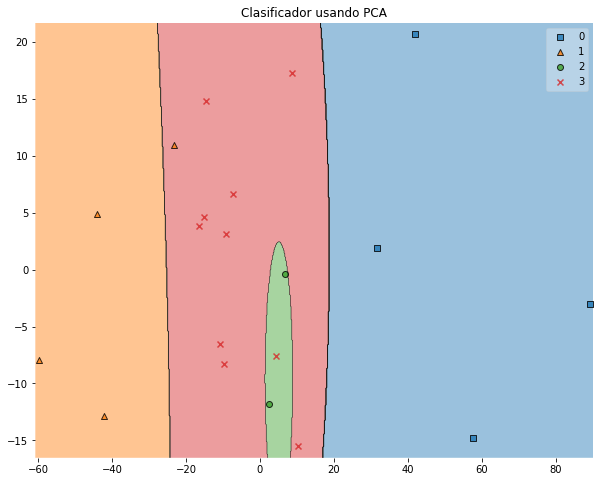

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Primero definimos las variables X e Y, como arrays de numpy
df_sinpuntos = df

X = df.values[:,0:7]
Y = df.values[:,7]

le = LabelEncoder()
y2 = le.fit_transform(Y)
y = y2

print(X,y)

###### Generamos un nuevo dataframe con sol dos componentes.
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(X)
print(X_pca_2c.shape)


pca_2c.explained_variance_ratio_.sum()
#   Out:    0.97763177502480336

###### Miramos el gráfico
from sklearn.naive_bayes import GaussianNB 
from mlxtend.plotting import plot_decision_regions



X=X_pca_2c
model = GaussianNB()
clf=model
clf.fit(X, y)

# Generamos el gráfico
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=clf)


plt.title("Clasificador usando PCA")


